# Interpolation/Fractional Delay/Resampling

[back to overview page](index.ipynb)

WARNING: this is work-in-progress!

Digital Audio Resampling Home Page: https://ccrma.stanford.edu/~jos/resample/

Delay-Line and Signal Interpolation: https://ccrma.stanford.edu/~jos/pasp06/Delay_Line_Signal_Interpolation.html

Time-Varying Delay Effects: https://ccrma.stanford.edu/~jos/pasp06/Time_Varying_Delay_Effects.html

MUS420/EE367A Lecture 4A: Interpolated Delay Lines, Ideal Bandlimited Interpolation, and Fractional Delay Filter Design: https://ccrma.stanford.edu/~jos/Interpolation/Welcome.html

TODO: a lot of explanations

For an introduction on NumPy and how to create simple signals, see [Creating Simple Audio Signals](http://nbviewer.ipython.org/urls/raw.github.com/mgeier/python-audio/master/simple-signals.ipynb).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

First, let's set the sampling rate we'll be using:

In [2]:
fs = 44100  # Hz

A nice sine tone as test signal ...

In [3]:
duration = 2  # seconds
frequency = 440  # Hz

t = np.arange(int(duration * fs)) / fs
sine = np.sin(2 * np.pi * frequency * t)

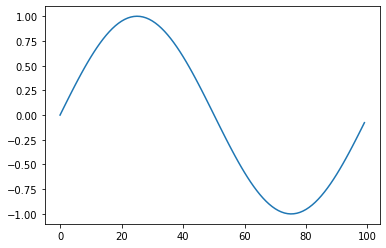

In [4]:
plt.plot(sine[:100])
plt.ylim(-1.1, 1.1);

In [5]:
# TODO: fade in/out!
# TODO: write WAV file

According to [JOS](https://ccrma.stanford.edu/~jos/pasp06/Linear_Interpolation.html):
$\hat{y}(n+\eta) = (1-\eta) \cdot y(n) + \eta \cdot y(n+1)$

That's a one-zero FIR filter.

TODO: block diagram like in [JOS](https://ccrma.stanford.edu/~jos/pasp06/Fractional_Delay_Filtering_Linear.html)?

In [6]:
def dumb_linear_interpolation(x, fraction):
    "This is a very dumb implementation!"
    x = np.asarray(x)
    assert x.ndim == 1, "x must be one-dimensional!"
    
    y_len = len(x) - 1
    y = np.empty(y_len)
    for i in range(y_len):
        y[i] = (1 - fraction) * x[i] + fraction * x[i + 1]
    return y

In [7]:
sine2 = dumb_linear_interpolation(sine, 0.5)

len(sine2)

88199

Note: length is one sample less

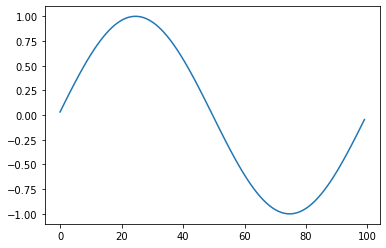

In [8]:
plt.plot(sine2[:100])
plt.ylim(-1.1, 1.1);

Looks OK? Sounds OK?

In [9]:
# TODO: same with noise, listen to both versions (WAV file) -> low-pass?

OK, this is actually FIR filtering (TODO: explain), so we can do it with a convolution:

In [10]:
# TODO: explain mode='valid'

sine3 = np.convolve(sine, [0.5, 0.5], mode='valid')

In [11]:
max(abs(sine2 - sine3))

0.0

When I tried it, there wasn't even a rounding error. YMMV.

Let's check the frequency response of our interpolation filter to check if it's really a low-pass filter.

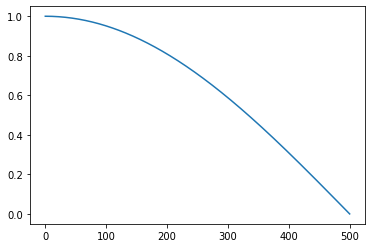

In [12]:
# TODO: better function to display frequency response?
# TODO: use scipy.signal.freqz()?
# TODO: in dB, log frequency?
# TODO: x-axis: frequencies (np.fftfreq()?)

fftlength = 1000
plt.plot(abs(np.fft.rfft([0.5, 0.5], fftlength)));

Yes, that looks like a low-pass filter!

(0, 1.1)

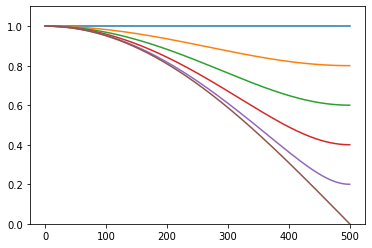

In [13]:
plt.plot(abs(np.fft.rfft(np.column_stack((
  [1  , 0  ],
  [0.9, 0.1],
  [0.8, 0.2],
  [0.7, 0.3],
  [0.6, 0.4],
  [0.5, 0.5])), fftlength, axis=0)))
plt.ylim(0, 1.1)

TODO: plot phase delay like in [JOS](https://ccrma.stanford.edu/~jos/pasp06/Fractional_Delay_Filtering_Linear.html)?

In [14]:
# TODO: many more things!

TODO: [One-Multiply Linear Interpolation](https://ccrma.stanford.edu/~jos/pasp06/One_Multiply_Linear_Interpolation.html)?

TODO: [First-Order Allpass Interpolation](https://ccrma.stanford.edu/~jos/pasp06/First_Order_Allpass_Interpolation.html)?

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>